In [1]:
import os, sys, copy
sys.path.append("../")
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import pickle

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from modules.AnalysisHelpers import ( colorPlot
                                     ,imgToColors
                                     ,subprocColorPlot
                                    )

In [4]:
img = cv2.imread("c:/users/wsutt/desktop/myb2.jpg")

In [5]:
img.shape

(2464, 3280, 3)

In [6]:
mini = img[:200,:300,:]

In [7]:
mini.shape

(200, 300, 3)

In [22]:
data = imgToColors(mini)

In [23]:
len(data[0])

60000

In [24]:
list(data[0][:10])

[73, 73, 78, 84, 80, 85, 82, 80, 78, 77]

In [25]:
data2 = imgToColors(mini, sampleN = 1000)

In [26]:
len(data2[0])

1000

In [27]:
data2[0][:10]

[85, 79, 83, 87, 88, 87, 84, 82, 80, 88]

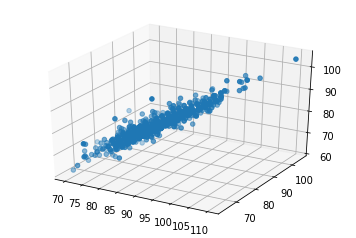

In [28]:
colorPlot(data2[0], data2[1], data2[2])

In [92]:
def colorPlot2(listB, listG, listR
               ,listColors = None
               ,spaceTotal = True
               ,spaceDefined = {}
               ,regionMarkers = None
              ):
    '''
        3d plot of pixels color values

        TODOS
            [ ] maybe G should be z?
            [ ] add some randomness; how do equal-value points appear?
            [ ] title uses spaceDefined / spaceTotal inputs
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=listB, ys=listG, zs=listR, c=listColors)
    
    if spaceTotal and len(spaceDefined.keys()) == 0:
        ax.set_xlim3d(0, 255)
        ax.set_ylim3d(0, 255)
        ax.set_zlim3d(0, 255)
        
    if len(spaceDefined.keys()) > 0:
        if spaceDefined.get('x', None) is not None:
            ax.set_xlim3d(spaceDefined['x'])
        if spaceDefined.get('y', None) is not None:
            ax.set_ylim3d(spaceDefined['y'])
        if spaceDefined.get('z', None) is not None:
            ax.set_zlim3d(spaceDefined['z'])
        
    
    ax.set_xlabel('B')
    ax.set_ylabel('G')
    ax.set_zlabel('R')
    
    
    plt.show()

In [94]:
channels = imgToColors(img, sampleN = 1000)

colors = channelsToColorStr(*channels)

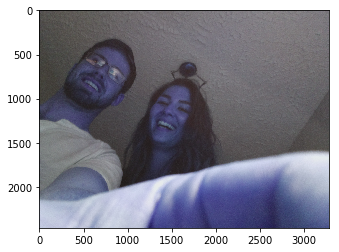

In [97]:
plt.imshow(img)

In [98]:
from modules.Interproc import GuiviewState
from modules.Interproc import DBInterface
from modules.ControlTracking import TrackFactory
from modules.ControlDisplay import Display

In [99]:
db = DBInterface("../data/misc/books/search-params-1/data.db")

listGS = [pickle.loads(record[1]) for record in db.selectAll()]

In [100]:
gs = listGS[0]

In [105]:
print [_gs.frameCounter for _gs in listGS]
print [_gs.zoomRect for _gs in listGS]

[0, 189, 312]
[(192.0, 150.0, 66.0, 68.0), (283.0, 419.0, 22.0, 22.0), (222.0, 262.0, 20.0, 22.0)]


In [102]:
zoomImg = gs.getZoomWindow()
zoomImg.shape

(68, 66, 3)

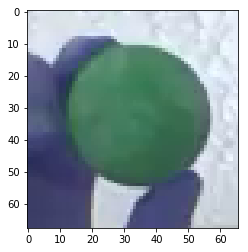

In [106]:
plt.imshow(zoomImg)

In [109]:
channels = imgToColors(zoomImg, sampleN = 2000)

colors = channelsToColorStr(*channels)

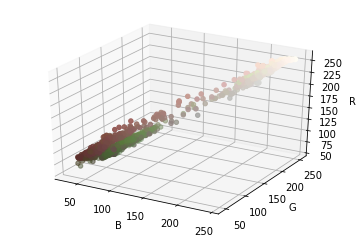

In [110]:
colorPlot2(channels[0], channels[1], channels[2], 
           spaceTotal = False, 
           listColors = colors)

In [111]:
#TODO - build  an all color 3d plot

In [ ]:
#extract circle pixels

In [89]:
def channelsToColorStr(listB, listG, listR):
    return [
        "#" + hex(x[0])[2:] + hex(x[1])[2:] + hex(x[2])[2:]
        for x in zip(listR, listG, listB)
    ]

In [90]:
listB, listG, listR = data[0], data[1], data[2]
listColors = channelsToColorStr(listB, listG, listR)

In [91]:
listColors[:10]

['#514849',
 '#514849',
 '#574d4e',
 '#5d5354',
 '#584f50',
 '#5b5555',
 '#585252',
 '#565050',
 '#564d4e',
 '#54494d']

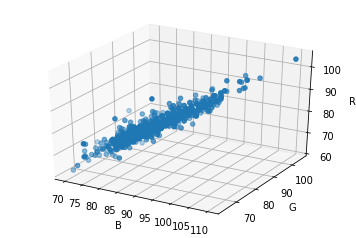

In [42]:
colorPlot2(data2[0], data2[1], data2[2], spaceTotal = False)

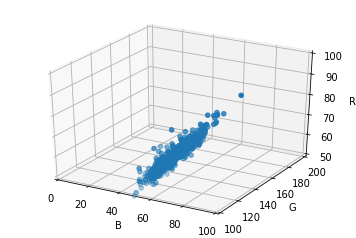

In [48]:
colorPlot2(data2[0], data2[1], data2[2], 
           spaceDefined = {
               'x': (0,100),
               'y': (100,200),
               'z': (50,100)
           }
          )

In [49]:
#TODO - thresh -> cube corner markers
#TODO - cube croners + cube edges

In [ ]:
#TODO - test 3d plot with multiple same values

In [51]:
import random

In [67]:
def randList(domain=10, n=1):
    return [random.sample(range(domain), 1)[0] for _ in range(n)]

x = randList()
y = randList()
z = randList()

x.extend([5]*100)
y.extend([5]*100)
z.extend([5]*100)

In [59]:
len(y)

103

In [63]:
def fuzzy(listData, diff=3):
    return [x + random.uniform(-diff, diff) for x in listData]

In [65]:
fuzzy(x)[:6]

[4.841684153649066,
 3.5146965732787994,
 6.762826272371687,
 6.676612981139462,
 2.681651038498908,
 4.432364061005128]

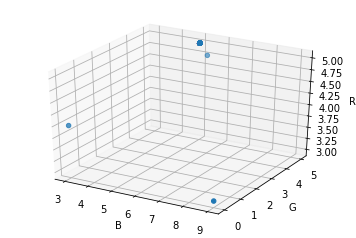

In [61]:
colorPlot2(x,y,z, spaceTotal=False)

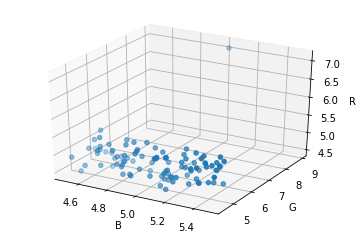

In [112]:
colorPlot2(fuzzy(x, diff = 0.5),fuzzy(y, diff = 0.5),fuzzy(z, diff = 0.5)
           , spaceTotal=False)